In [88]:
import numpy as np
import matplotlib.pyplot as plt

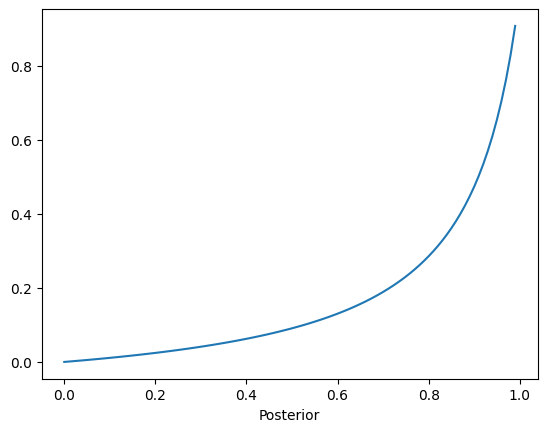

In [89]:
prior = np.arange(0, 1, 0.01)
plt.plot(prior, prior / (10 - 9 * prior))
plt.xlabel("Prior")
plt.xlabel("Posterior")
plt.show()

In [90]:
# 2 alternatives, but could be more
n_alternatives = 2
prior = np.ones(n_alternatives)/n_alternatives

In [91]:
# no data involved subjective belief
prior[0] # the probability of innocence
prior[1] # the probability of guilt

0.5

In [92]:
n_outcomes = 2
TNR = 0.9
TPR = 0.8
likelihood = np.zeros([n_outcomes, n_alternatives])
likelihood[0][0] = TNR # negative, innocent/no covid
likelihood[1][0] = 1 - TNR # positive, innocent / no covid
likelihood[0][1] = 1 - TPR # negative , guilty / covid
likelihood[1][1] = TPR # positive, guilty / covid
likelihood

array([[0.9, 0.2],
       [0.1, 0.8]])

In [93]:
def posterior(prior, likelihood, data):
    n_alternatives = len(prior)
    evidence = np.zeros(n_alternatives)
    for hypothesis in range(len(prior)):
        evidence[hypothesis] = likelihood[data][hypothesis] * prior[hypothesis]
    
    posterior = evidence.copy() / np.sum(evidence)
    return posterior

In [94]:
posterior(prior, likelihood, 1)

array([0.11111111, 0.88888889])

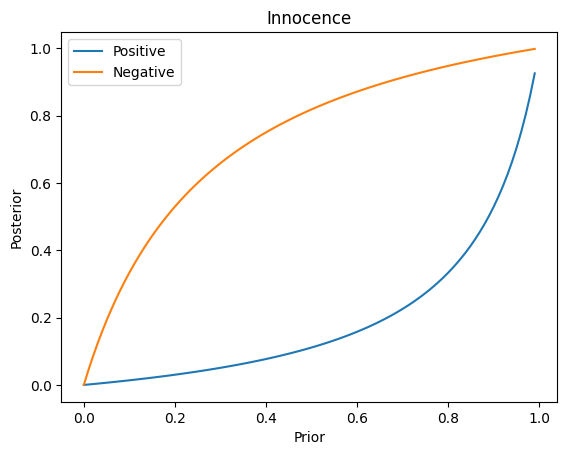

array([0.        , 0.00126103, 0.00254453, 0.00385109, 0.00518135,
       0.00653595, 0.00791557, 0.00932091, 0.01075269, 0.01221167,
       0.01369863, 0.01521438, 0.01675978, 0.01833568, 0.01994302,
       0.02158273, 0.02325581, 0.02496329, 0.02670623, 0.02848576,
       0.03030303, 0.03215926, 0.03405573, 0.03599374, 0.03797468,
       0.04      , 0.0420712 , 0.04418985, 0.04635762, 0.04857621,
       0.05084746, 0.05317324, 0.05555556, 0.05799649, 0.06049822,
       0.06306306, 0.06569343, 0.06839187, 0.07116105, 0.0740038 ,
       0.07692308, 0.07992203, 0.08300395, 0.08617234, 0.08943089,
       0.09278351, 0.09623431, 0.09978769, 0.10344828, 0.10722101,
       0.11111111, 0.11512415, 0.11926606, 0.12354312, 0.12796209,
       0.13253012, 0.1372549 , 0.14214464, 0.14720812, 0.15245478,
       0.15789474, 0.16353887, 0.16939891, 0.17548747, 0.18181818,
       0.1884058 , 0.19526627, 0.20241692, 0.20987654, 0.21766562,
       0.22580645, 0.23432343, 0.24324324, 0.25259516, 0.26241

In [95]:
Q = np.arange(0, 1, 0.01)
post_pos = np.zeros(len(Q))
post_neg = np.zeros(len(Q))

for k in range(len(Q)):
    prior[0] = Q[k]
    prior[1] = 1 - Q[k]
    post_pos[k] = posterior(prior, likelihood, 1)[0]
    post_neg[k] = posterior(prior, likelihood, 0)[0]

plt.plot(Q, post_pos)
plt.plot(Q, post_neg)
plt.legend(["Positive", "Negative"])
plt.xlabel("Prior")
plt.ylabel("Posterior")
plt.title("Innocence")
plt.show()
post_pos

In [100]:
beta = np.arange(0, 1, 0.001)
# beta is the probability of heads
def ber_likelihood(beta, x):
    return np.power(beta, np.sum(x)) * np.power(1 - beta, np.sum(1 - x))

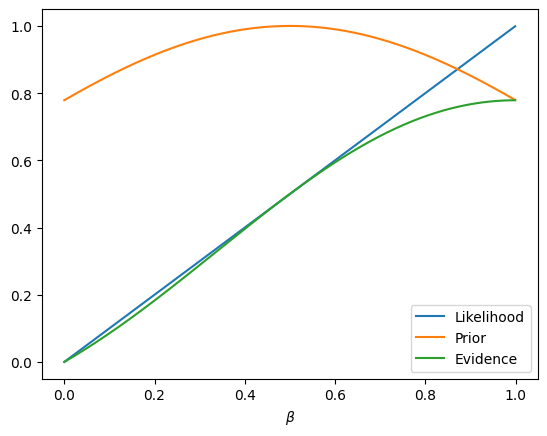

In [123]:
x = np.array([1, 0, 0, 0 ,1 ,1])
x = np.array([1])
prior = np.exp(-(beta - 0.5)**2)
#prior /= np.sum(prior)
ber_likelihood(beta, x)
plt.plot(beta, ber_likelihood(beta, x))
plt.plot(beta, prior)
plt.plot(beta, ber_likelihood(beta, x)*prior)
plt.legend(["Likelihood", "Prior", "Evidence"])
plt.xlabel("$\\beta$")
plt.show()